#**Importing the Required Libraries**

In [1]:
#Importing  os to create a helper variable, which allows us to easily manages different paths in the code  
import os


In [2]:
#glob is used to return all file paths that match a specific pattern. 
import glob

In [3]:
# If we want to display a single image, then "Image" Library is fine, but if we want to display multiple images by just running a single cell
# then we need to import display 

from IPython.display import Image, display

In [4]:
# To clear output in the notebook use clear_output function
#display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [5]:
!nvidia-smi

Mon Feb 13 05:22:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
HOME = os.getcwd()

In [7]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

#**YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.**

In [8]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [9]:
!pip install ultralytics==8.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.8 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=21b185c04ff4b5565546bd7d681f11fc21d301413a9687793662cb986c11944b
  Stored in directory: /root/.cache/pip/wheels/b1/a3/c2/6df046c09459b73cc9bb6c4401b0be6c47048baf9a1617c485
Success

##Checking whether YOLOv8 is Installed and its working Fine

In [10]:
import ultralytics

In [11]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


#**Importing the PPE Detection Dataset from Roboflow**

In [12]:
!mkdir {HOME}/datasets


In [13]:
!pwd

/content


In [14]:
%cd {HOME}/datasets


/content/datasets


In [15]:
!pwd

/content/datasets


In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4hIhYKGrnWHaWXRqZsZg")
project = rf.workspace("objet-detect-yolov5").project("eep_detection-u9bbd")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=83b8f0d45ec58fc21607954d8f8805379b143fa8e4323244865d2034a6922010
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to EEP_Detection-1 in yolov5pytorch:: 100%|██████████| 6482/6482 [00:02<00:00, 3027.40it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [17]:
%cd {HOME}

/content


In [18]:
%cd {dataset.location}

/content/datasets/EEP_Detection-1


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [21]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/EEP_Detection/data.yaml epochs=90 imgsz=640

/content
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/EEP_Detection/data.yaml, epochs=90, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3

In [22]:
!ls {HOME}/runs/detect/train2

args.yaml					   train_batch11361.jpg
confusion_matrix.png				   train_batch11362.jpg
events.out.tfevents.1676265886.67258a421350.917.0  train_batch1.jpg
F1_curve.png					   train_batch2.jpg
P_curve.png					   val_batch0_labels.jpg
PR_curve.png					   val_batch0_pred.jpg
predictions.json				   val_batch1_labels.jpg
R_curve.png					   val_batch1_pred.jpg
results.csv					   val_batch2_labels.jpg
results.png					   val_batch2_pred.jpg
train_batch0.jpg				   weights
train_batch11360.jpg


#**Displaying the Confusion Matrix**

/content


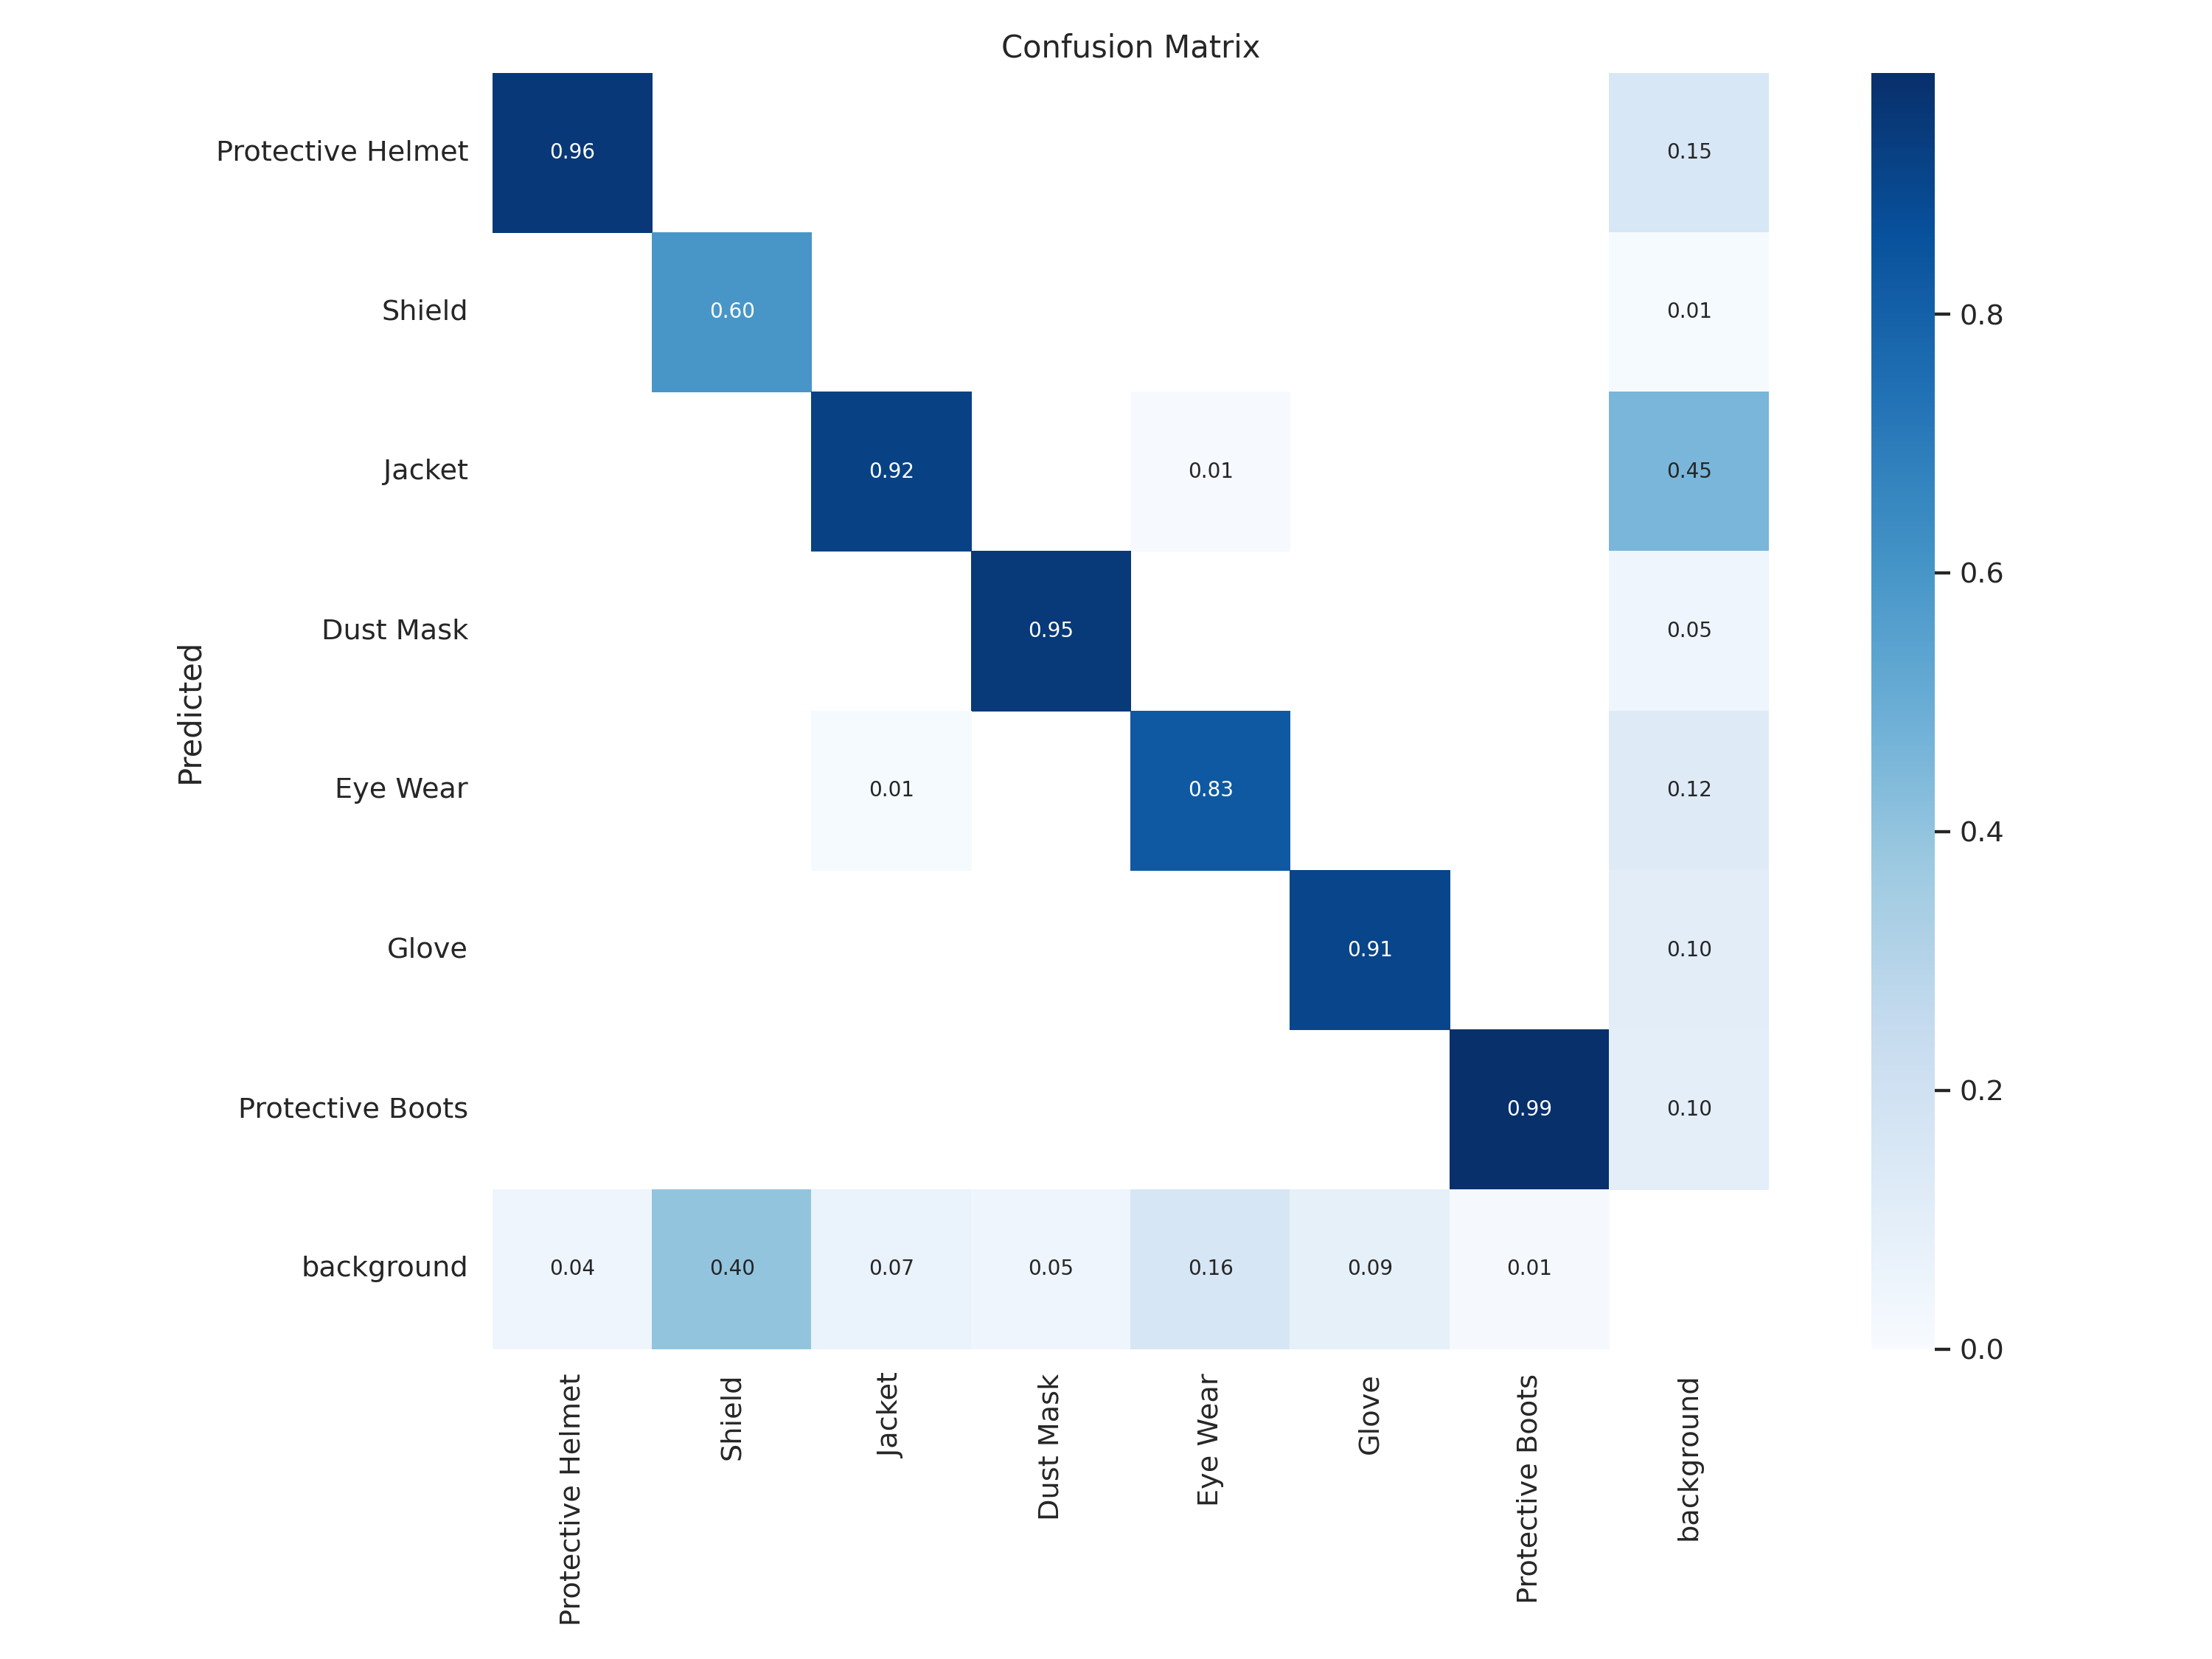

In [ ]:
#Confusion matrix is the chart that shows how our model handles different classes
#92% of the time the model detected correctly that the person is wearing jacket, while 1% of the time we get the Bounding Box but
#the jacket is incorrectly classified as Eye wear, while 7% of the time when person is wearing the Jacket the model is unable to detect it
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content


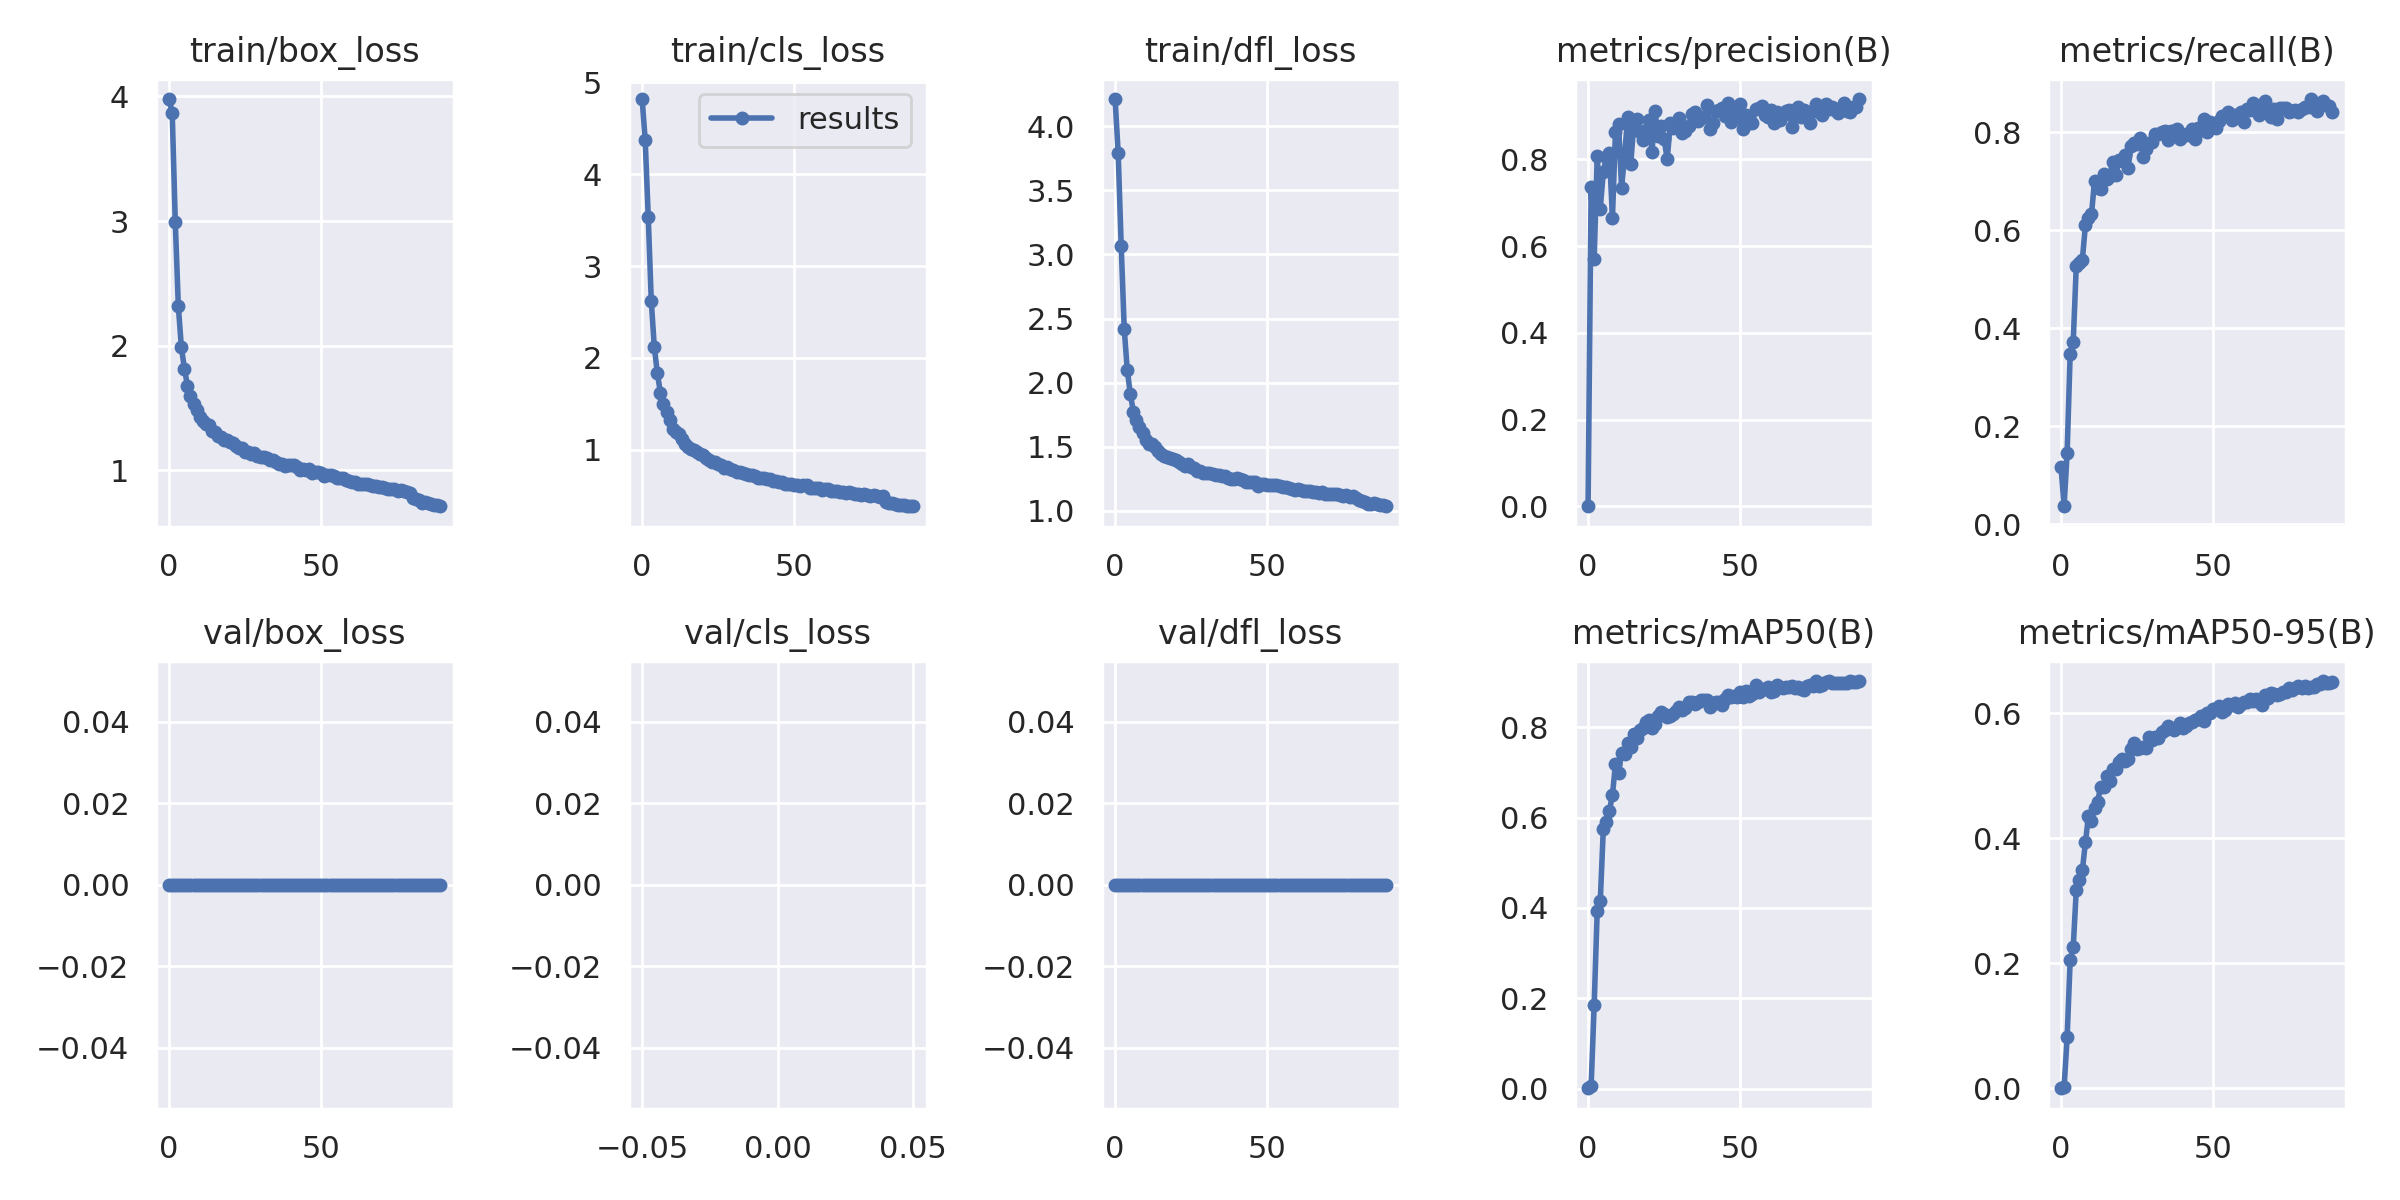

In [ ]:
# Here is the graph of the training and validation loss
#box loss and class loss is important 
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


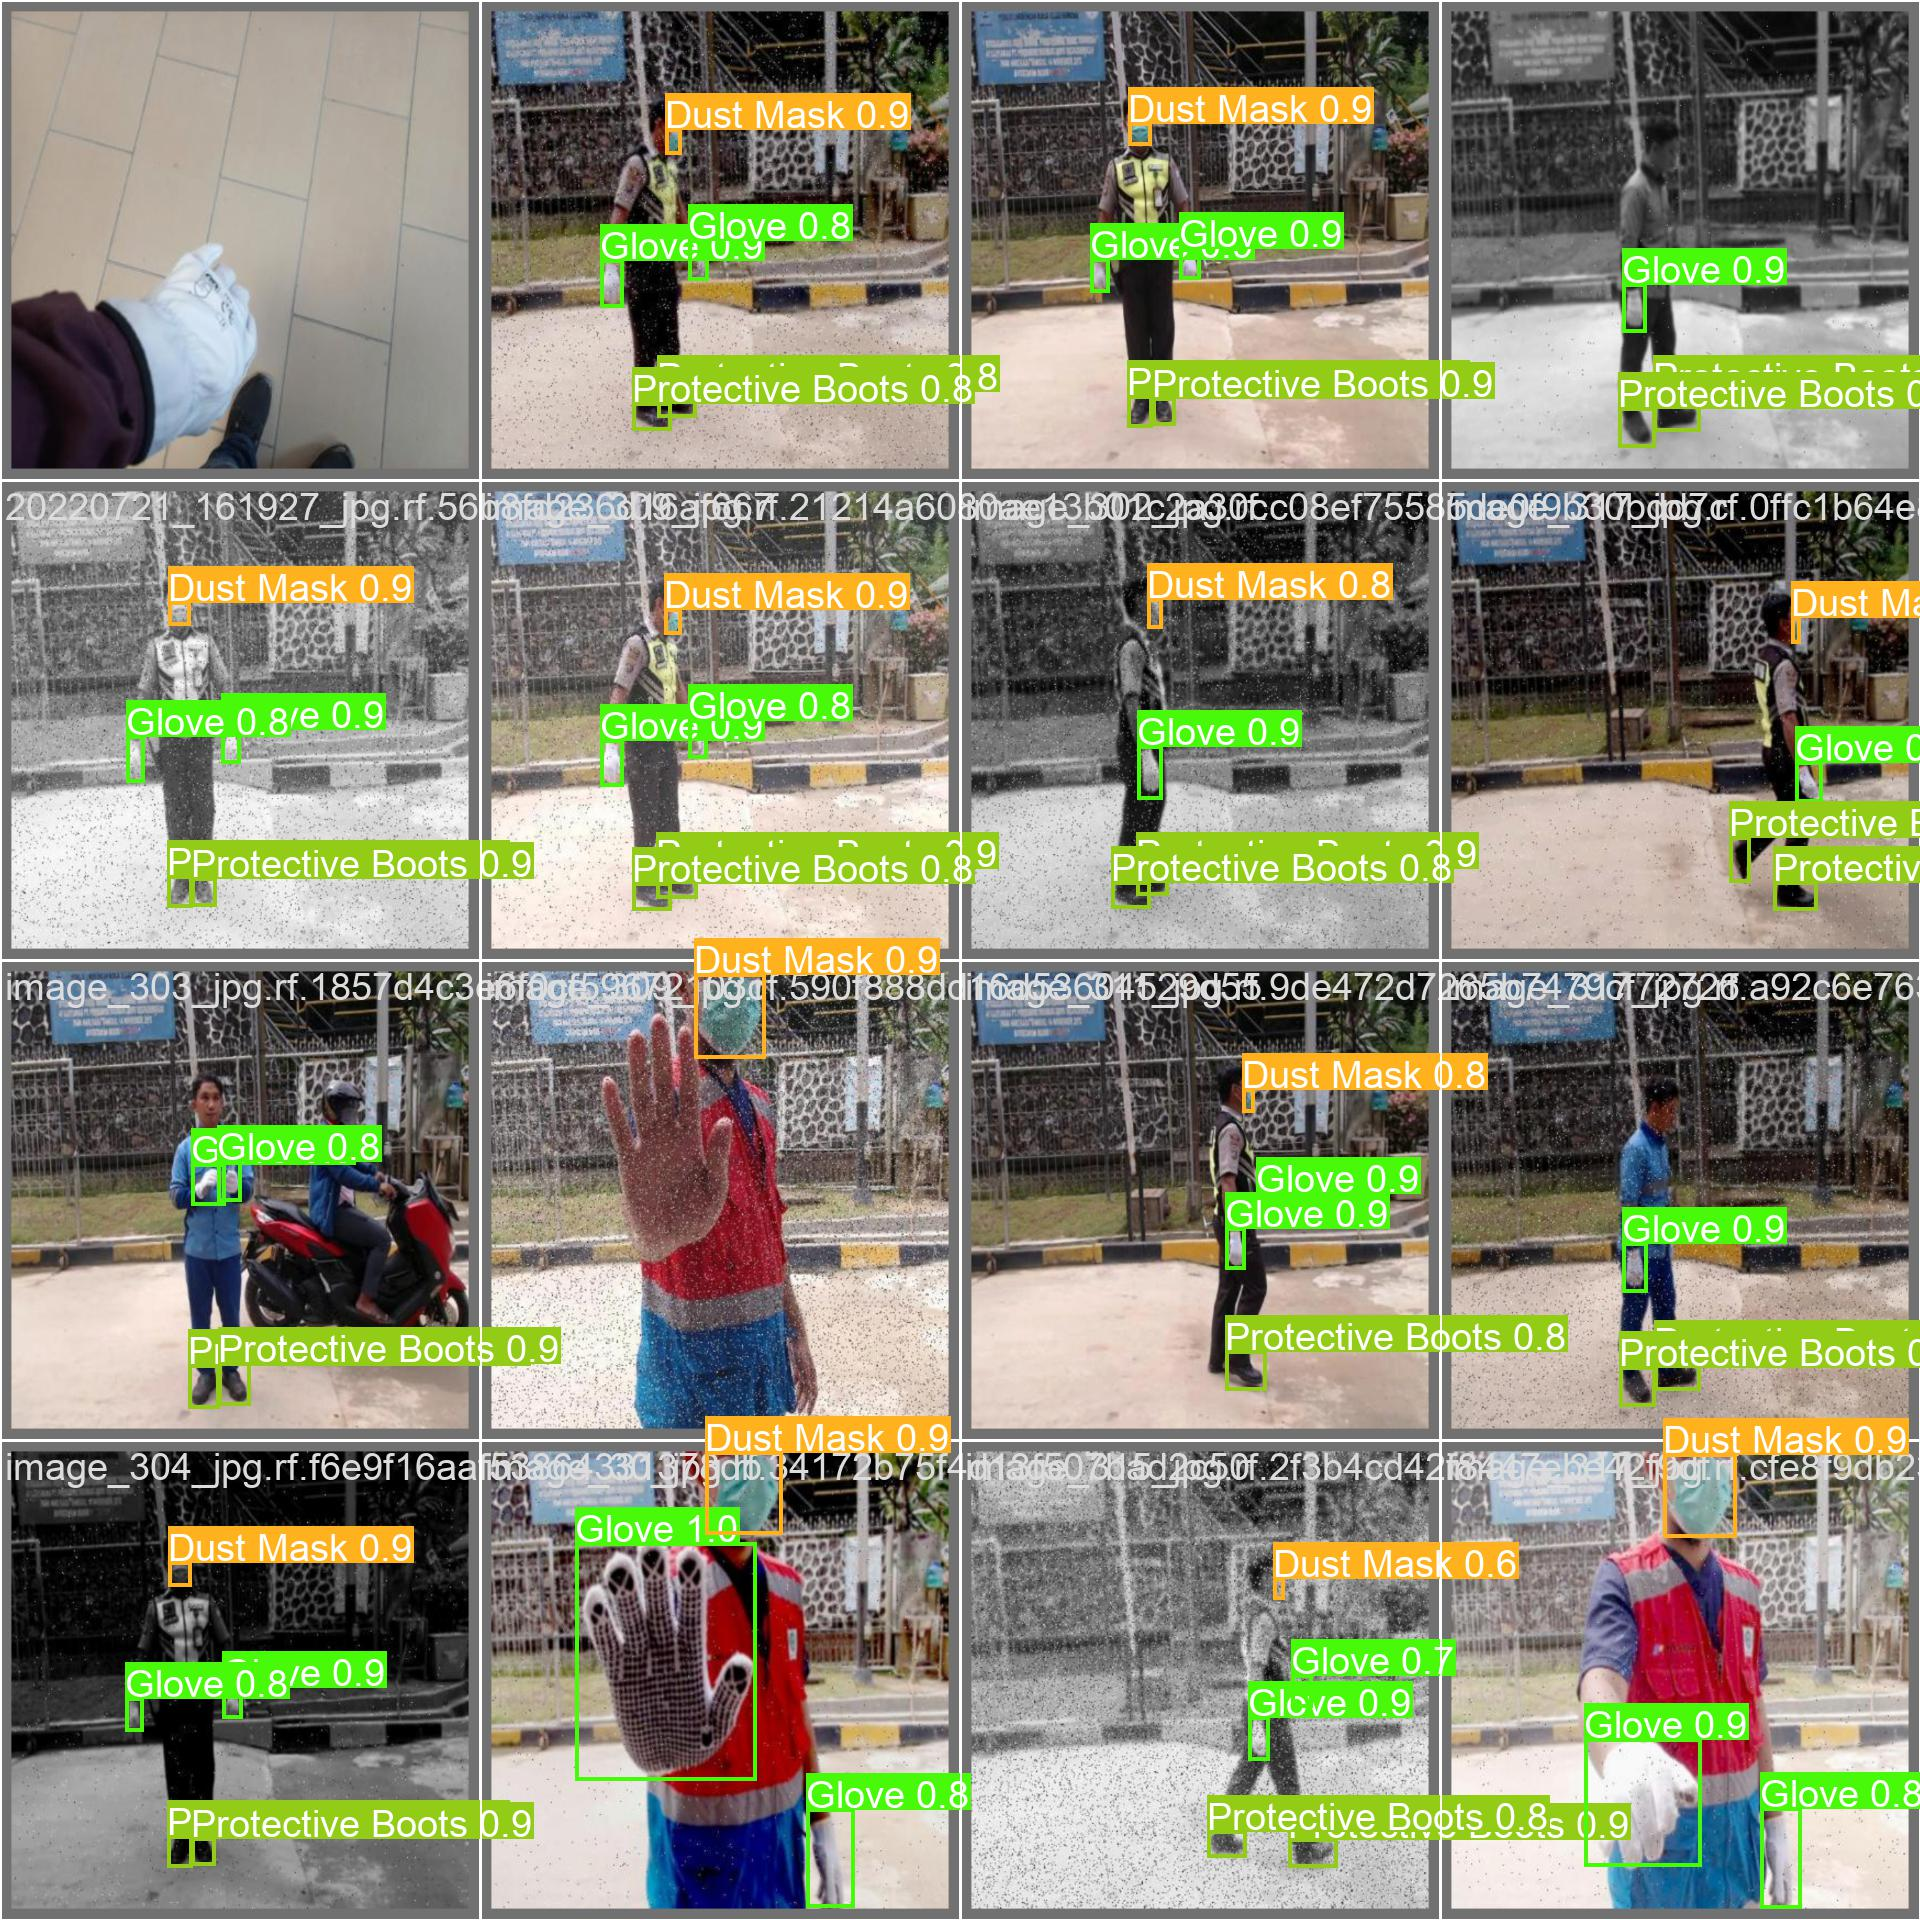

In [ ]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a 
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [ ]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using 
#CLI to do that, The only difference is our mode = val instead of train

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data=/content/datasets/EEP_Detection/data.yaml

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/EEP_Detection/valid/labels.cache... 647 images, 0 backgrounds, 0 corrupt: 100% 647/647 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 41/41 [00:22<00:00,  1.84it/s]
                   all        647       3074      0.911      0.865      0.902      0.652
     Protective Helmet        647        765      0.959      0.952      0.978      0.769
                Shield        647         25      0.821      0.551      0.662       0.43
                Jacket        647        580       0.87      0.907      0.928       0.72
             Dust Mask        647        314      0.959      0.939      0.968      0.701
              Eye Wear        647        149      0.845      0.819      0.847      0.507
                 G

#**Inference with Custom Model**

In [ ]:
#Inference means a prediction that we can run on an image to detect the label,
# whether classification or of a bounding box or a segmentation
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/datasets/EEP_Detection/test/images'

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs
image 1/324 /content/datasets/EEP_Detection/test/images/000446_jpg.rf.ae946a1122b8eaac534a4954f07b3755.jpg: 640x640 2 Protective Helmets, 38.2ms
image 2/324 /content/datasets/EEP_Detection/test/images/20220721_161946_jpg.rf.149c26cf563aa2ace0bdc099c4af8fef.jpg: 640x640 1 Dust Mask, 38.1ms
image 3/324 /content/datasets/EEP_Detection/test/images/20220721_162015_jpg.rf.f71cba1429b26a3c95b6f8706ea69853.jpg: 640x640 2 Dust Masks, 27.2ms
image 4/324 /content/datasets/EEP_Detection/test/images/20220721_162036_jpg.rf.f6b8fdbdef55ce36cd4ad61549b2c1e2.jpg: 640x640 1 Dust Mask, 25.2ms
image 5/324 /content/datasets/EEP_Detection/test/images/20220721_162308_jpg.rf.32a4cbe5e0f3e1bc5159596a1bbb833d.jpg: 640x640 1 Jacket, 2 Eye Wears, 25.2ms
image 6/324 /content/datasets/EEP_Detection/test/images/20220721_162435_jpg.rf

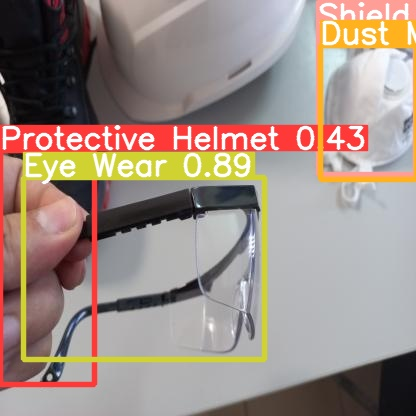

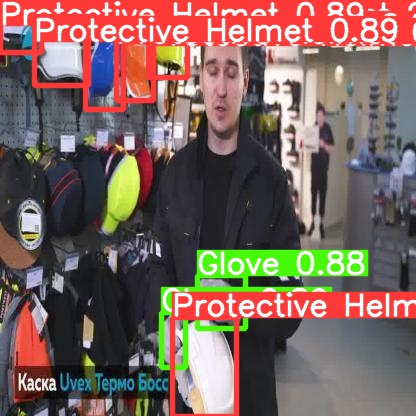

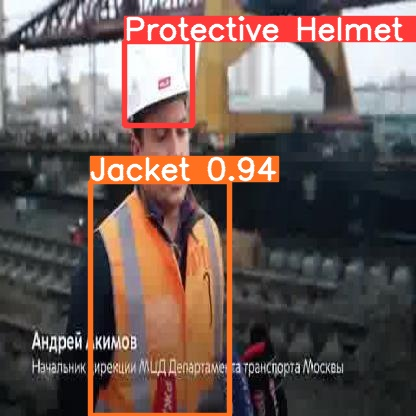

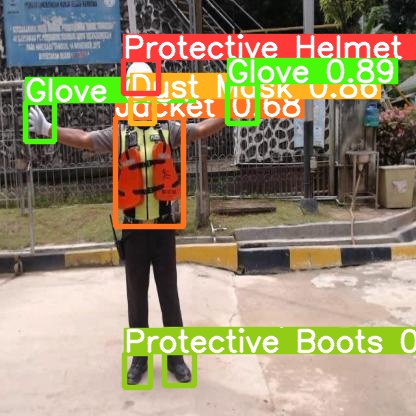

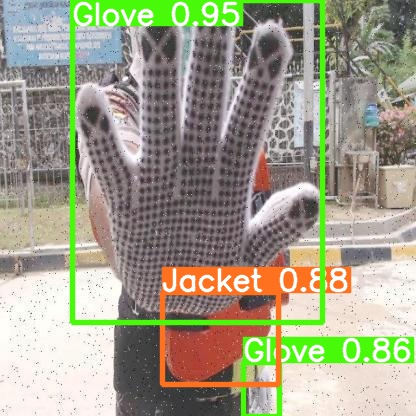

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict8/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

#**Testing on a Demo Video**

In [ ]:
!gdown "https://drive.google.com/uc?id=1crFwrpMF1OlaJ0ZCZjBNRo9llLEVR8VQ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1crFwrpMF1OlaJ0ZCZjBNRo9llLEVR8VQ&confirm=t
To: /content/demo.mp4
100% 42.9M/42.9M [00:00<00:00, 186MB/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/439) /content/demo.mp4: 384x640 2 Protective Helmets, 2 Jackets, 27.2ms
video 1/1 (2/439) /content/demo.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.5ms
video 1/1 (3/439) /content/demo.mp4: 384x640 2 Protective Helmets, 2 Jackets, 27.4ms
video 1/1 (4/439) /content/demo.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.5ms
video 1/1 (5/439) /content/demo.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.5ms
video 1/1 (6/439) /content/demo.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.5ms
video 1/1 (7/439) /content/demo.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.5ms
video 1/1 (8/439) /content/demo.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.8ms
video 1/1 (9/439) /content/demo.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.5ms
video 1/1 (10/439) /content/demo.mp4: 384x640 2 P

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict9/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Downloading the Demo Video2**

In [ ]:
!gdown "https://drive.google.com/uc?id=1cTIBNQ1R_7JAOURVv9cJ6P935ym_IkZ0&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1cTIBNQ1R_7JAOURVv9cJ6P935ym_IkZ0&confirm=t
To: /content/demo3.mp4
100% 20.3M/20.3M [00:00<00:00, 197MB/s]


#**Testing on the Demo Video**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/demo3.mp4'

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 27.3ms
video 1/1 (2/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (3/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (4/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (5/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (6/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (7/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (8/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (9/219) /content/demo3.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (10/219) /content/demo3.mp4: 384x640 2 

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict10/demo3.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Downloading the Demo Video3**

In [ ]:
!gdown "https://drive.google.com/uc?id=1256pNK0nQnEDT6FRLQAraTRkOY7BSprq&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1256pNK0nQnEDT6FRLQAraTRkOY7BSprq&confirm=t
To: /content/demo4.mp4
100% 16.9M/16.9M [00:00<00:00, 195MB/s]


#**Testing on the Demo Video**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/demo4.mp4'

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 1 Jacket, 27.3ms
video 1/1 (2/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (3/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (4/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 1 Jacket, 26.5ms
video 1/1 (5/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.5ms
video 1/1 (6/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.5ms
video 1/1 (7/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.5ms
video 1/1 (8/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.5ms
video 1/1 (9/337) /content/demo4.mp4: 384x640 2 Protective Helmets, 2 Jackets, 26.6ms
video 1/1 (10/337) /content/demo4.mp4: 384x6

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict10/demo3.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)